In [11]:
import numpy as np
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.datasets import cifar10
# Import the Sequential class
from keras.models import Sequential

(X_train,y_train),(X_test,y_test) = cifar10.load_data()

X_train = X_train.reshape (50000,32*32*3)
X_test = X_test.reshape (10000,32*32*3)
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential([
  layers.Dense(512,activation='relu',input_shape=(32*32*3,)),
  layers.Dense(112,activation='relu'),
  layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=500,batch_size=1000,validation_data=(X_test,y_test))

Epoch 1/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 171ms/step - accuracy: 0.1809 - loss: 2.3411 - val_accuracy: 0.3242 - val_loss: 1.9140
Epoch 2/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - accuracy: 0.3306 - loss: 1.8923 - val_accuracy: 0.3563 - val_loss: 1.8226
Epoch 3/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 167ms/step - accuracy: 0.3669 - loss: 1.7999 - val_accuracy: 0.3861 - val_loss: 1.7471
Epoch 4/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - accuracy: 0.3883 - loss: 1.7372 - val_accuracy: 0.3970 - val_loss: 1.7251
Epoch 5/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - accuracy: 0.4036 - loss: 1.6953 - val_accuracy: 0.4188 - val_loss: 1.6587
Epoch 6/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - accuracy: 0.4283 - loss: 1.6378 - val_accuracy: 0.4232 - val_loss: 1.6413
Epoch 7/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - accuracy: 0.4291 - loss: 1.6150 - val_accuracy: 0.4349 - val_loss: 1.6011
Epoch 8/500
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.4406 - loss: 1.5929 - val_

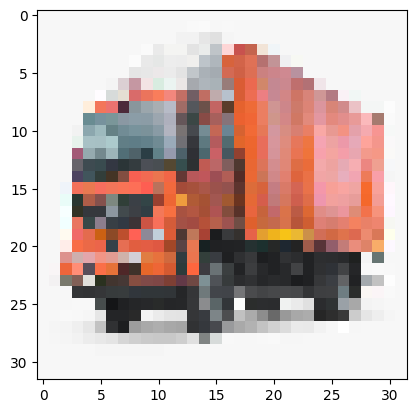

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted class: Truck


In [35]:
from keras.utils import load_img
from keras.utils import img_to_array
import matplotlib.pyplot as plt
import cv2
import numpy as np


img = load_img('/content/Truck.jpeg', target_size=(32, 32))
plt.imshow(img)
plt.show()

img = img_to_array(img)
img = img.reshape(1, 32 * 32 * 3)
img = img.astype('float32')
img = img / 255.0
np.argmax(model.predict(img), axis=-1)
prediction = model.predict(img)
predicted_class_index = np.argmax(prediction, axis=-1)

def predict_image(image_path):
    img = load_img(image_path, target_size=(32, 32))
    if predicted_class_index[0] == 0:
        predicted_class_label = "Airplane"
    elif predicted_class_index[0] == 1:
        predicted_class_label = "Automobile"
    elif predicted_class_index[0] == 2:
        predicted_class_label = "Bird"
    elif predicted_class_index[0] == 3:
        predicted_class_label = "Cat"
    elif predicted_class_index[0] == 4:
        predicted_class_label = "Deer"
    elif predicted_class_index[0] == 5:
        predicted_class_label = "Dog"
    elif predicted_class_index[0] == 6:
        predicted_class_label = "Frog"
    elif predicted_class_index[0] == 7:
        predicted_class_label = "Horse"
    elif predicted_class_index[0] == 8:
        predicted_class_label = "Ship"
    elif predicted_class_index[0] == 9:
        predicted_class_label = "Truck"
    else:
        predicted_class_label = "Unknown"
    return predicted_class_label

image_path = '/content/Truck.jpeg'
predicted_class_label = predict_image(image_path)
print(f"Predicted class: {predicted_class_label}")